In [6]:
#Import the data set

import pandas as pd
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.csv', names=columns)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
data['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

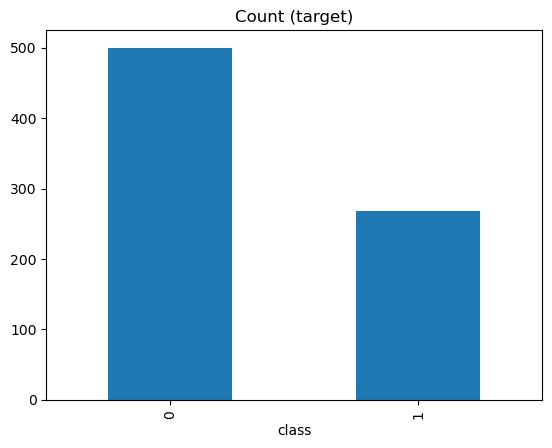

In [9]:
#print bar chart
data['class'].value_counts().plot(kind='bar', title='Count (target)');

#### Down Sampling - Majority Class - Using Random Sampling

In [10]:
count_class_0, count_class_1 = data['class'].value_counts()

# Divide by class
df_class_0 = data[data['class'] == 0] #majority class
df_class_1 = data[data['class'] == 1] #minority class

print('Class = 0 ', df_class_0.shape[0])
print('Class = 1 ', df_class_1.shape[0])

Class = 0  500
Class = 1  268


In [11]:
# Sample Majority class (y=0, to have same number of records as minority calls (y=1)
df_class_0_under = df_class_0.sample(count_class_1)

df_class_0_under.shape

(268, 9)

Random under-sampling:
class
0    268
1    268
Name: count, dtype: int64
Num records =  536


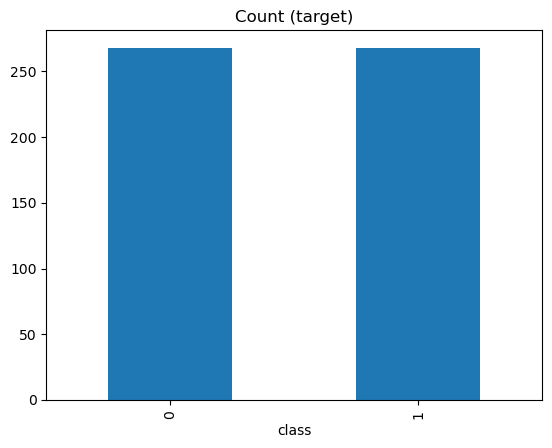

In [13]:
# join the dataframes containing y=1 and y=0
df_test_under = pd.concat([df_class_0_under, df_class_1])

print('Random under-sampling:')
print(df_test_under['class'].value_counts())
print("Num records = ", df_test_under.shape[0])

df_test_under['class'].value_counts().plot(kind='bar', title='Count (target)');

#### Down Sampling - Majority Class - Using imblearn 

imblearn over-sampling:
0    268
1    268
Name: class, dtype: int64
Num records =  536


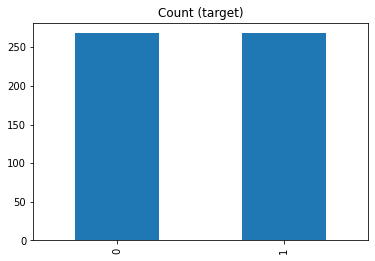

In [23]:
from imblearn.under_sampling import RandomUnderSampler

#separate the data in descriptive and target attributes
X = data.drop('class', axis=1)
Y = data['class']

rus = RandomUnderSampler(random_state=42, replacement=True)
X_rus, Y_rus = rus.fit_resample(X, Y)

df_rus = pd.concat([pd.DataFrame(X_rus), pd.DataFrame(Y_rus, columns=['class'])], axis=1)

print('imblearn over-sampling:')
print(df_rus['class'].value_counts())
print("Num records = ", df_rus.shape[0])

df_rus['class'].value_counts().plot(kind='bar', title='Count (target)');

In [24]:
# we should have the same/similar results as previous. Although the selection of records could be different

 #### Down/Under sampling the majority class y=1 using Sci-Kit Learn

Original Data distribution
class
0    500
1    268
Name: count, dtype: int64
Sci-Kit Learn : resample : Down Sampled data set
class
1    268
0    268
Name: count, dtype: int64
Num records =  536


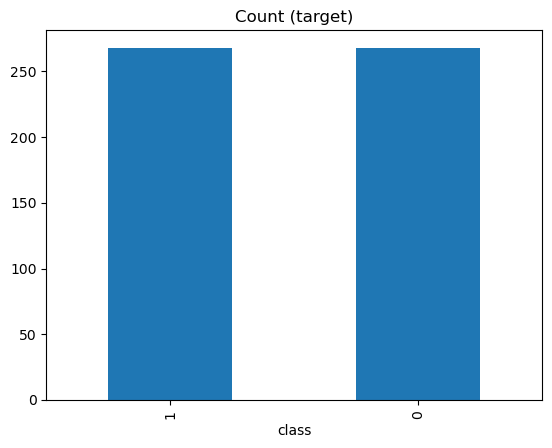

In [14]:
from sklearn.utils import resample

print("Original Data distribution")
print(data['class'].value_counts())

# Down Sample Majority class
down_sample = resample(data[data['class']==0],
  replace = True, # sample with replacement
  n_samples = data[data['class']==1].shape[0], # to match minority class
  random_state=42) # reproducible results

# Combine majority class with upsampled minority class
train_downsample = pd.concat([data[data['class']==1], down_sample])

# Display new class counts
print('Sci-Kit Learn : resample : Down Sampled data set')
print(train_downsample['class'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample['class'].value_counts().plot(kind='bar', title='Count (target)');

#### Over sampling the minority call y=0 (using random sampling)

Random over-sampling:
class
0    500
1    500
Name: count, dtype: int64


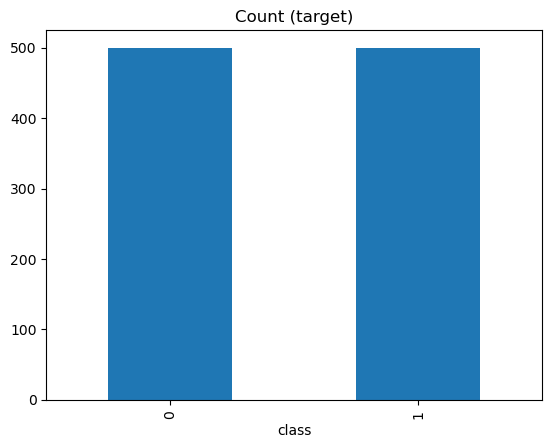

In [15]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['class'].value_counts())

df_test_over['class'].value_counts().plot(kind='bar', title='Count (target)');

#### Over sampling the minority call y=0 using SMOTE

class
0    500
1    268
Name: count, dtype: int64
SMOTE over-sampling:
class
1    500
0    500
Name: count, dtype: int64


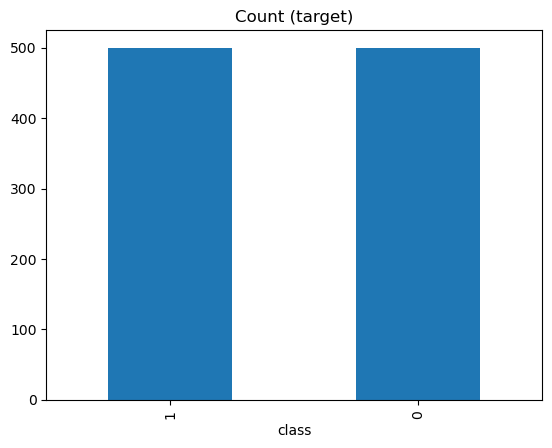

In [16]:
from imblearn.over_sampling import SMOTE

print(data['class'].value_counts())
X = data.drop('class', axis=1)
Y = data['class']

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res, columns=['class'])], axis=1)

print('SMOTE over-sampling:')
print(df_smote_over['class'].value_counts())

df_smote_over['class'].value_counts().plot(kind='bar', title='Count (target)');